In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

1. На вход передатчика подается некоторый сигнал во времени. В качестве сигнала
возможно рассмотреть сигнал прямоугольных периодических импульсов.
Реализовать свертку сигнала с некоторым ядром во временной области.
В качестве ядра свертки использовать (а) $y=A \cdot e^{-x^2}$, (б) любую линейную функцию.
Замечание: Для реализации свертки можно использовать готовую встроенную
функцию numpy: convolve(signal,kernel)

##### *Прямоугольный сигнал*

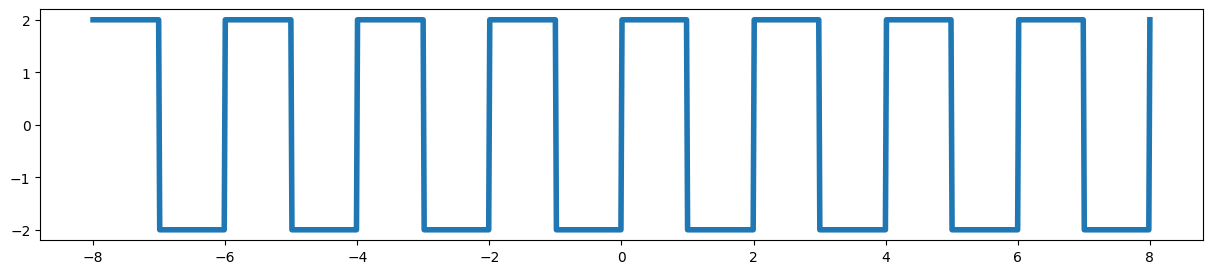

In [2]:
def square_signal(t, A, T):
    '''
    Функция возвращает значение прямоугольного сигнала в заданный момент времени t.
    t - момент времени, A - амплитуда сигнала, T - период сигнала.
    '''
    return A * signal.square(2 * np.pi * t / T)

# Амплитуда и период сигнала
A_square = 2
T_square = 2

# Количество точек для генерации прямоугольного сигнала
num_square = 1000

t_square = np.linspace(-4 * T_square, 4 * T_square, num_square)
y = square_signal(t_square, A_square, T_square)

plt.figure(figsize=(15, 3))
plt.plot(t_square, y, linewidth=4)
plt.show()

##### *Ядра свертки*

10.0


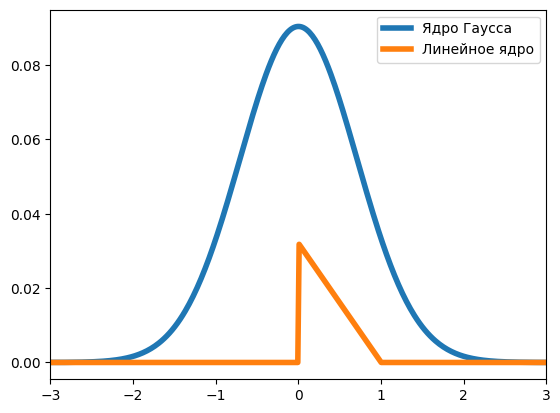

In [3]:
def kernel1(x, A):
    return A * np.exp(-x**2)

def kernel2(x):
    y = (1 - x)
    return np.where(((y > 1) | (y < 0)), 0, y)

yk1 = kernel1(t_square, 1)
yk1 /= np.sum(yk1) / 10
print(np.sum(yk1))
yk2 = kernel2(t_square)
yk2 /= np.sum(yk2)
plt.plot(t_square, yk1, linewidth=4)
plt.plot(t_square, yk2, linewidth=4)
plt.xlim(-3, 3)
plt.legend(['Ядро Гаусса', 'Линейное ядро'])
plt.show()

##### *Свертка сигнала с ядрами*

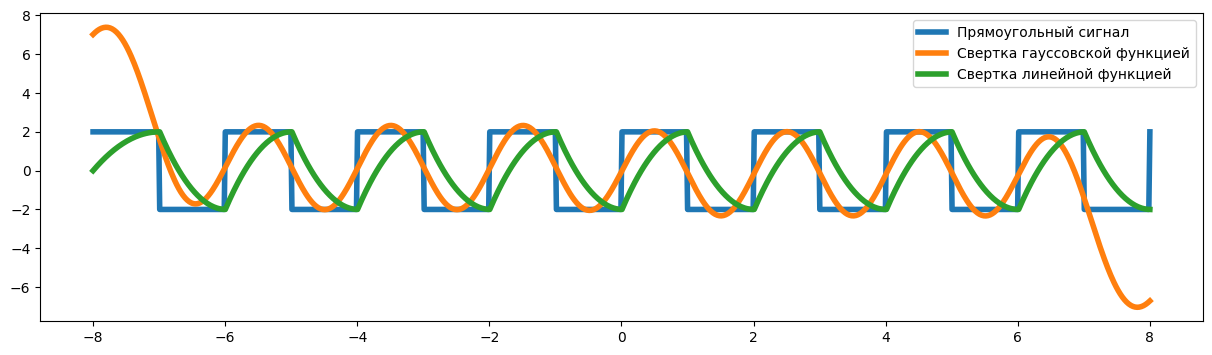

In [4]:
filtered_1 = np.convolve(y, yk1, mode='same')
filtered_2 = np.convolve(y, yk2, mode='same')
plt.figure(figsize=(15, 4))
plt.plot(t_square, y, linewidth=4)
plt.plot(t_square, filtered_1, linewidth=4)
plt.plot(t_square, filtered_2, linewidth=4)
plt.legend(['Прямоугольный сигнал', 'Свертка гауссовской функцией', 'Свертка линейной функцией'])
plt.show()

2*. Чтобы разобраться в алгоритме свертки двух сигналов – реализуйте свой
алгоритм, осуществляющий свертку сигнала с произвольным ядром.

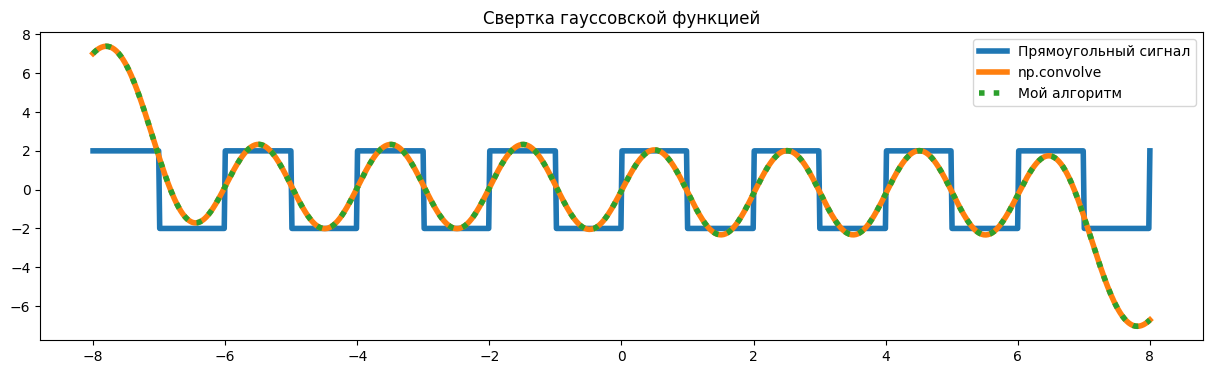

In [5]:
def convolve(signal, kernel, mode='full'):
    # Размеры входных данных
    n = len(signal)
    m = len(kernel)

    # Результат свертки
    result = [0] * (n + m - 1)

    # Выполнение свертки
    for i in range(n):
        for j in range(m):
            result[i+j] += signal[i] * kernel[j]

    if mode == 'same':
        # Обрезка результата до длины самого длинного входного массива
        if n > m:
            result = result[(m-1)//2 : (m-1)//2 + n]
        else:
            result = result[(n-1)//2 : (n-1)//2 + m]
    
    return np.array(result)

filtered_1_ = convolve(y, yk1, mode='same')
plt.figure(figsize=(15, 4))
plt.plot(t_square, y, linewidth=4)
plt.plot(t_square, filtered_1, linewidth=4)
plt.plot(t_square, filtered_1_, linestyle='dotted', linewidth=4)
plt.title("Свертка гауссовской функцией")
plt.legend(['Прямоугольный сигнал', 'np.convolve', 'Мой алгоритм'])
plt.show()

3. Для любого выбранного Вами ядра свертки убедиться, что свертка во временной
области эквивалентна умножению в частотной области (теорема о свертке).

##### *Преобразование Фурье. Было взято линейное ядро*

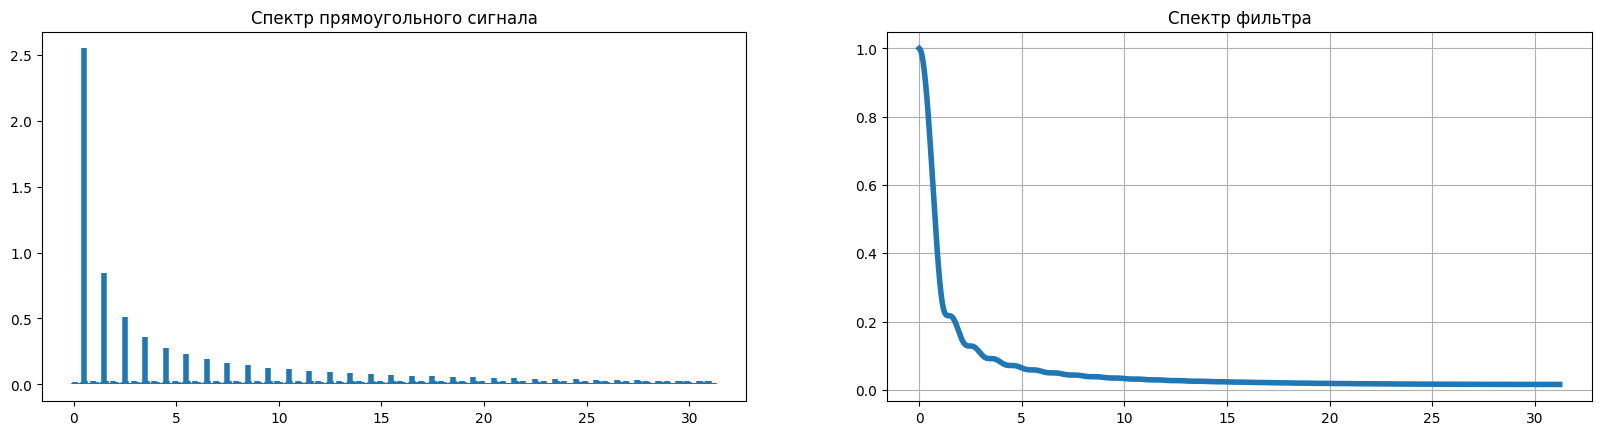

In [6]:
freq_square = np.fft.rfftfreq(len(t_square), d=(t_square[1]-t_square[0]))
yff = np.fft.rfft(y)
yk2ff = np.fft.rfft(yk2)

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(20)

axs[0].set_title("Спектр прямоугольного сигнала")
axs[0].vlines(freq_square, 0, np.abs(yff) / num_square * 2, linewidth=4)
axs[1].set_title("Спектр фильтра")
axs[1].plot(freq_square, np.abs(yk2ff), linewidth=4)
axs[1].grid()
plt.show()

##### *Применение фильтра*

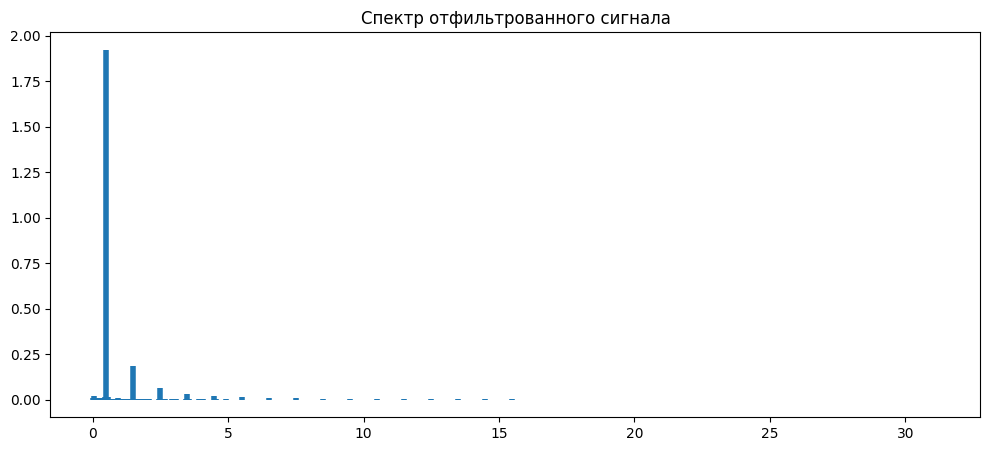

In [7]:
yf_filtered_1 = yff * yk2ff
plt.figure(figsize=(12,5))
plt.title("Спектр отфильтрованного сигнала")
plt.vlines(freq_square, 0, np.abs(yf_filtered_1) / num_square * 2, linewidth=4)
plt.show()

##### *Обратное преобразование Фурье*

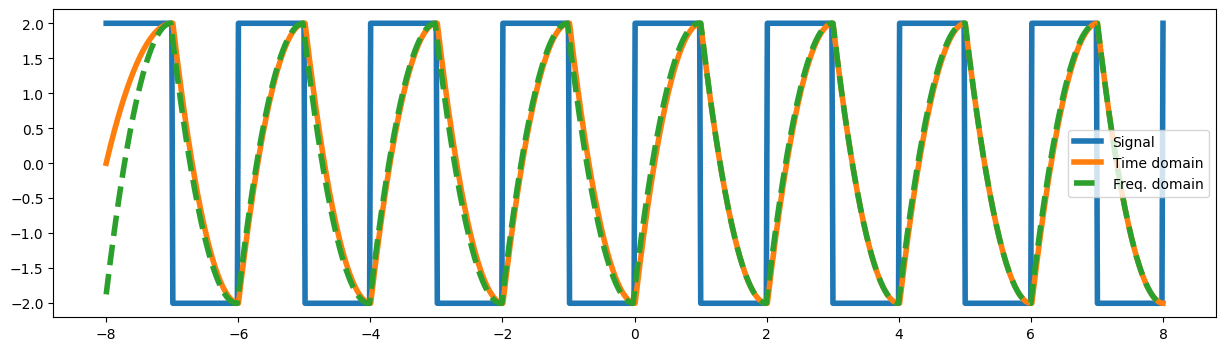

In [8]:
filtered_freq_2 = np.fft.irfft(yf_filtered_1)

plt.figure(figsize=(15, 4))
plt.plot(t_square, y, linewidth=4)
plt.plot(t_square, filtered_2, linewidth=4)
plt.plot(t_square, filtered_freq_2, linestyle='--', linewidth=4)
plt.legend(['Signal', 'Time domain', 'Freq. domain'])
plt.show()

4. Разобраться в реализации свертки с ядром Гаусса для реализации
сглаживающего фильтра во временной области.

##### *Ядро Гаусса на линейном пространстве, ограниченном 3-мя сигмами*

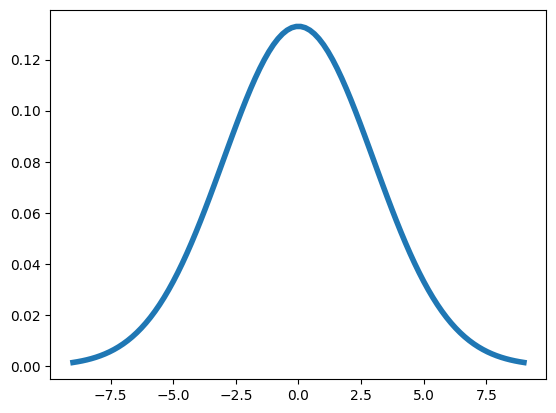

In [9]:
def gaussian_kernel(sigma, size):
    x = np.linspace(-3 * sigma, 3 * sigma, size)
    y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(x**2) / (2 * sigma**2))
    return x, y

x_gaussian, y_gaussian = gaussian_kernel(3, 100)
plt.plot(x_gaussian, y_gaussian, linewidth=4)
plt.show()

##### *Косинусоидальный сигнал*

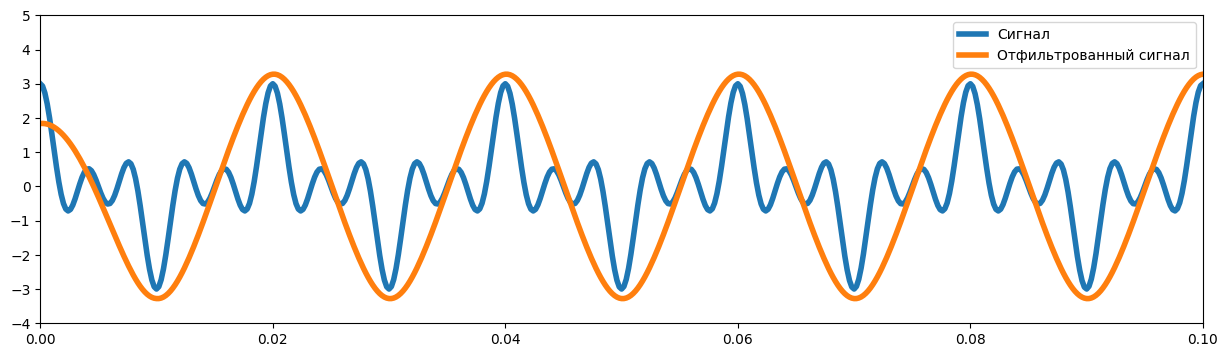

In [10]:
def cos_signal(t, f, A=1):
    '''
    Функция возвращает значение косинусоидального сигнала в заданный момент времени t.
    t - время, f - список частот сигнала, A - амплитуда сигнала.
    '''
    y = 0
    for i in f:
        w = 2 * np.pi * i
        y += A * np.cos(w * t)
    return y

num_cos = 5000  # количество отсчетов
f = [50, 150, 250]

# создание сигнала
t_cos = np.linspace(0, 1, num_cos)
y_cos = cos_signal(t_cos, f)

# свертка
filtered_1_ = np.convolve(y_cos, y_gaussian, mode='same')

plt.figure(figsize=(15,4))
plt.plot(t_cos, y_cos, label="Сигнал", linewidth=4)
plt.plot(t_cos, filtered_1_, label="Отфильтрованный сигнал", linewidth=4)
plt.xlim(0, 0.1)
plt.ylim(-4, 5)
plt.legend()
plt.show()

5. Реализовать пункт (4) в частотной области. Убедиться, что результаты совпадают.
Настройте параметры ядра Гаусса таким образом, чтобы реализовать: (а) узкополосной
фильтр (б) фильтр нижних частот

##### *Преобразование Фурье*

In [11]:
freq_cos = np.fft.rfftfreq(len(t_cos), d=(t_cos[1]-t_cos[0]))
yff = np.fft.rfft(y_cos)

##### *Ядро Гаусса в частотной области. Узкополосной фильтр и фильтр нижних частот*

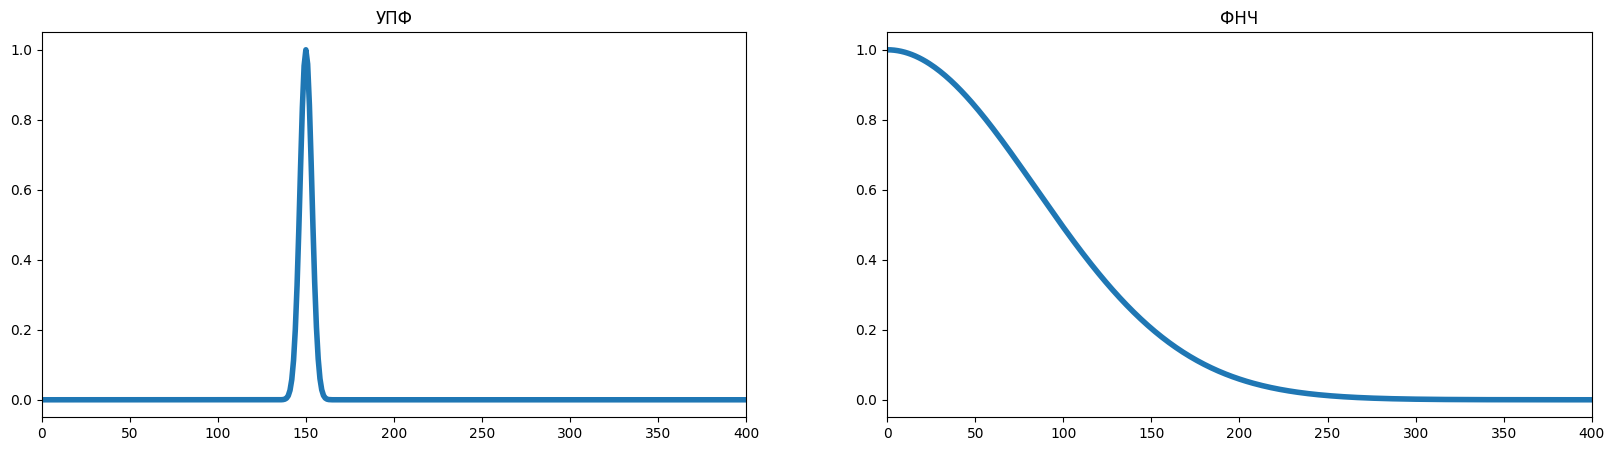

In [12]:
def freq_gaussian_kernel(freq, peak, fwhm):
    s = fwhm * (2 * np.pi - 1) / (4 * np.pi)
    g = np.exp(-0.5 * ((freq - peak) / s)**2)
    return g

gaussian_narrowband_filter = freq_gaussian_kernel(freq_cos, f[1], 8)
gaussian_lowpass_filter = freq_gaussian_kernel(freq_cos, 0, f[0]*4)

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].set_title("УПФ")
axs[0].plot(freq_cos, gaussian_narrowband_filter, linewidth=4)
axs[0].set_xlim(0, 400)
axs[1].set_title("ФНЧ")
axs[1].plot(freq_cos, gaussian_lowpass_filter, linewidth=4)
axs[1].set_xlim(0, 400)
plt.show()

##### *Применение фильтров*

In [13]:
yff_narrowband = yff * gaussian_narrowband_filter
yf_narrowband = np.fft.irfft(yff_narrowband)

yff_lowpass = yff * gaussian_lowpass_filter
yf_lowpass = np.fft.irfft(yff_lowpass)

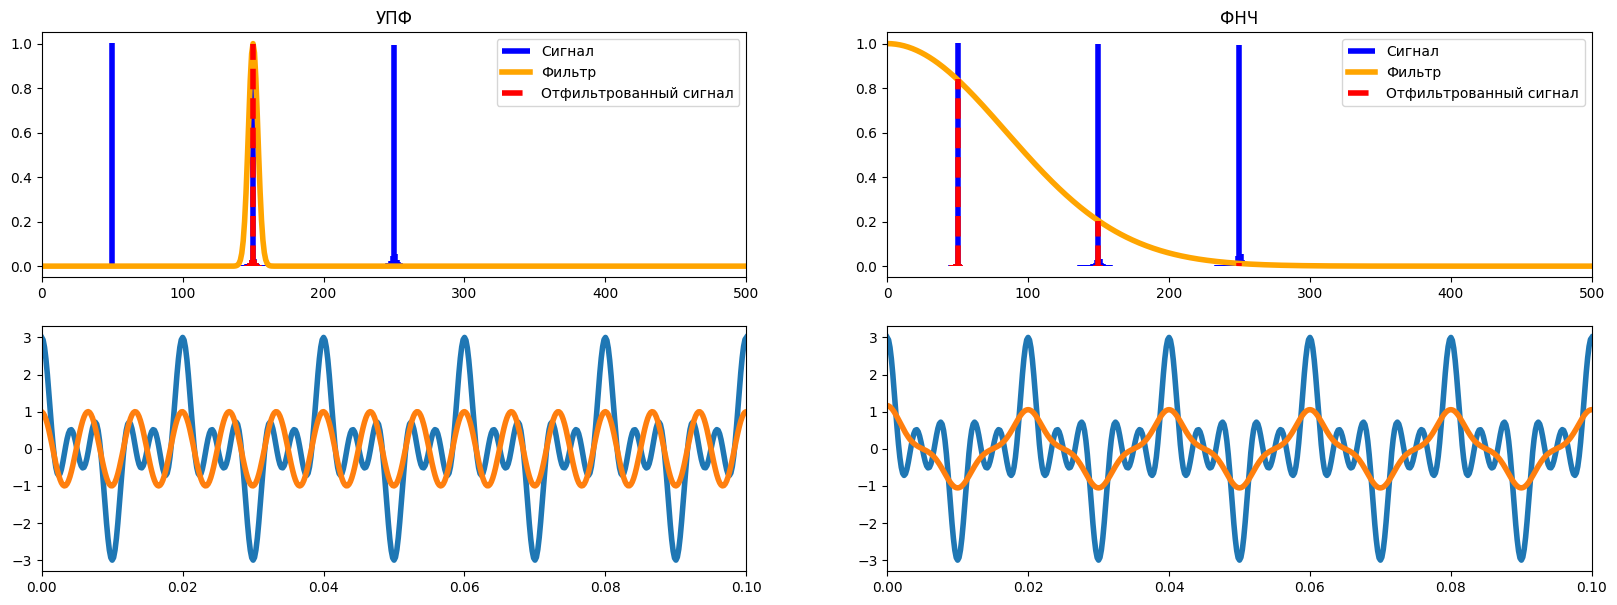

In [14]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(7)
fig.set_figwidth(20)

axs[0, 0].set_title("УПФ")

axs[0, 0].vlines(freq_cos, 0, np.abs(yff) / num_cos * 2, linewidth=4, color='blue', label="Сигнал")
axs[0, 0].plot(freq_cos, gaussian_narrowband_filter, color='orange', linewidth=4, label="Фильтр")
axs[0, 0].vlines(freq_cos, 0, np.abs(yff_narrowband) / num_cos * 2, color='r', linestyle="--", linewidth=4, label="Отфильтрованный сигнал")
axs[0, 0].legend()
axs[0, 0].set_xlim(0, 500)

axs[1, 0].plot(t_cos, y_cos, linewidth=4)
axs[1, 0].plot(t_cos, yf_narrowband, linewidth=4)
axs[1, 0].set_xlim(0, 0.1)

axs[0, 1].set_title("ФНЧ")

axs[0, 1].vlines(freq_cos, 0, np.abs(yff) / num_cos * 2, linewidth=4, color='blue', label="Сигнал")
axs[0, 1].plot(freq_cos, gaussian_lowpass_filter, color='orange', linewidth=4, label="Фильтр")
axs[0, 1].vlines(freq_cos, 0, np.abs(yff_lowpass) / num_cos * 2, color='r', linestyle="--", linewidth=4, label="Отфильтрованный сигнал")
axs[0, 1].legend()
axs[0, 1].set_xlim(0, 500)

axs[1, 1].plot(t_cos, y_cos, linewidth=4)
axs[1, 1].plot(t_cos, yf_lowpass, linewidth=4)
axs[1, 1].set_xlim(0, 0.1)
plt.show()
plt.show()

6. Реализовать полосовой фильтр, используя окно Планка.

$a(k)=\begin{cases} 0, \,\,\, k=0 \\ \dfrac{1}{e^{z_a(k)}+1}, \,\,\, 0 \lt k \lt \epsilon (N-1) \\ 1, \,\,\, \epsilon (N-1) \le k \le (1-\epsilon)(N-1) \\ \dfrac{1}{e^{z_b(k)}+1}, \,\,\, (1-\epsilon)(N-1) \lt k \lt N-1 \\ 0, \,\,\, k = N-1\end{cases}$

$z_a(k)=\epsilon (N-1)(\frac{1}{k}+\frac{1}{k-\epsilon (N-1)})$

$z_b(k)=\epsilon (N-1)(\frac{1}{N-1-k}+\frac{1}{(1-\epsilon) (N-1)-k})$

$0 \lt \epsilon \le 0.5$

##### *Окно Планка*

In [15]:
def freq_plank_window(freq_cos, start_freq, end_freq, eps=0.25):
    def z_a(k, num, eps):
        return eps * (num - 1) * (1 / k + 1 / (k - eps * (num - 1)))

    def z_b(k, num, eps):
        return eps * (num - 1) * (1 / (num - 1 - k) + 1 / ((1 - eps) * (num - 1) - k))

    num = np.sum((freq_cos > start_freq) & (freq_cos < end_freq))
    k = np.arange(num)

    result = np.zeros(num)

    result = np.where((0 < k) & (k < eps * (num - 1)), 
                      1 / (np.exp(z_a(k, num, eps)) + 1), result)

    result = np.where((eps * (num - 1) <= k) & (k <= (1 - eps) * (num - 1)), 
                      1, result)

    result = np.where(((1 - eps) * (num - 1) < k) & (k < num - 1), 
                      1 / (np.exp(z_b(k, num, eps)) + 1), result)

    plank_window = np.zeros_like(freq_cos)

    plank_window[(freq_cos >= start_freq) & (freq_cos <= end_freq)] = result
    
    return plank_window

plank_window = freq_plank_window(freq_cos, start_freq=120, end_freq=180, eps=0.3)

C:\Temp\ipykernel_21924\2417633555.py:3: RuntimeWarning: divide by zero encountered in divide
  return eps * (num - 1) * (1 / k + 1 / (k - eps * (num - 1)))
C:\Temp\ipykernel_21924\2417633555.py:6: RuntimeWarning: divide by zero encountered in divide
  return eps * (num - 1) * (1 / (num - 1 - k) + 1 / ((1 - eps) * (num - 1) - k))


##### *Применение окна Планка*

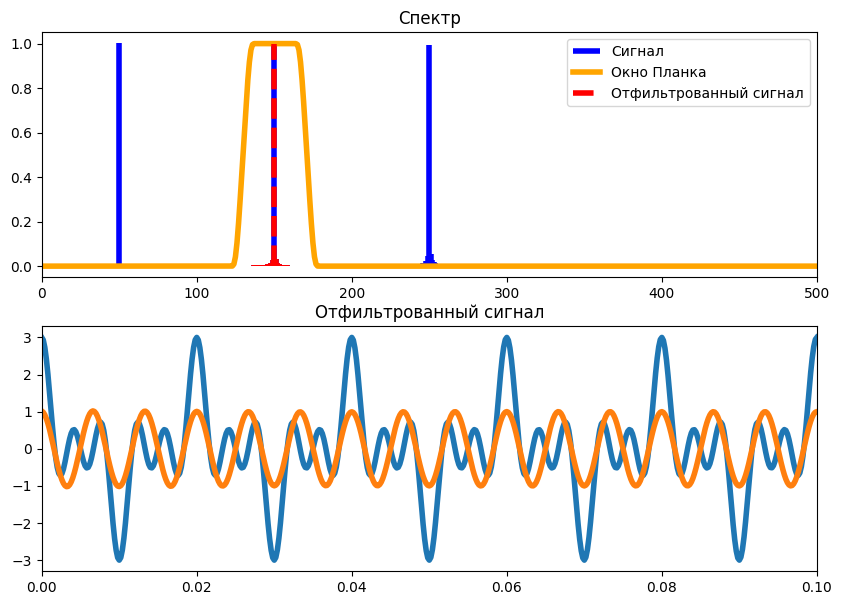

In [16]:
yff_filtered = yff * plank_window
yf_filtered_3 = np.fft.irfft(yff_filtered)

fig, axs = plt.subplots(2)
fig.set_figheight(7)
fig.set_figwidth(10)

axs[0].set_title("Спектр")
axs[0].vlines(freq_cos, 0, np.abs(yff) / num_cos * 2, linewidth=4, color='blue', label="Сигнал")
axs[0].plot(freq_cos, plank_window, color='orange', linewidth=4, label="Окно Планка")
axs[0].vlines(freq_cos, 0, np.abs(yff_filtered) / num_cos * 2, color='r', linestyle="--", linewidth=4, label="Отфильтрованный сигнал")
axs[0].legend()
axs[0].set_xlim(0, 500)

axs[1].set_title("Отфильтрованный сигнал")
axs[1].plot(t_cos, y_cos, linewidth=4)
axs[1].plot(t_cos, yf_filtered_3, linewidth=4)
axs[1].set_xlim(0, 0.1)
plt.show()

7. Сравнить результат фильтрации зашумленного сигнала при использовании ядра
Гаусса и окна Планка.

##### *Добавление шума*

In [17]:
def add_noise(signal, noise_level=1):
    '''
    Добавление к сигналу гауссовского шума 
    '''
    return signal + np.random.normal(0, noise_level, signal.shape)

y_noised = add_noise(y_cos, 2)

##### *Сравнение фильтров*

C:\Temp\ipykernel_21924\2417633555.py:3: RuntimeWarning: divide by zero encountered in divide
  return eps * (num - 1) * (1 / k + 1 / (k - eps * (num - 1)))
C:\Temp\ipykernel_21924\2417633555.py:6: RuntimeWarning: divide by zero encountered in divide
  return eps * (num - 1) * (1 / (num - 1 - k) + 1 / ((1 - eps) * (num - 1) - k))


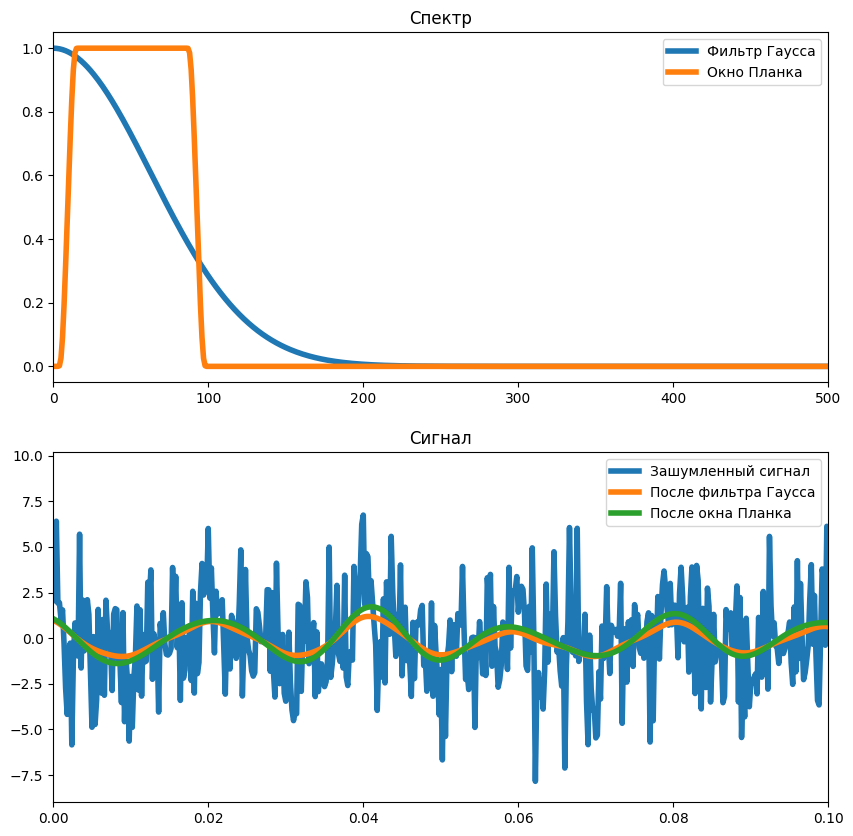

In [18]:
gaussian_lowpass_filter_2 = freq_gaussian_kernel(freq_cos, 0, f[0]*3)
plank_window_2 = freq_plank_window(freq_cos, start_freq=1, end_freq=100, eps=0.15)

yff_noised = np.fft.rfft(y_noised)

yff_filtered_gauss = yff_noised * gaussian_lowpass_filter_2
yff_filtered_plank = yff_noised * plank_window_2

yf_filtered_gauss = np.fft.irfft(yff_filtered_gauss)
yf_filtered_plank = np.fft.irfft(yff_filtered_plank)

fig, axs = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(10)

axs[0].set_title("Спектр")
axs[0].plot(freq_cos, gaussian_lowpass_filter_2, linewidth=4, label="Фильтр Гаусса")
axs[0].plot(freq_cos, plank_window_2, linewidth=4, label="Окно Планка")
axs[0].legend()
axs[0].set_xlim(0, 500)

axs[1].set_title("Cигнал")
axs[1].plot(t_cos, y_noised, linewidth=4, label="Зашумленный сигнал")
axs[1].plot(t_cos, yf_filtered_gauss, linewidth=4, label="После фильтра Гаусса")
axs[1].plot(t_cos, yf_filtered_plank, linewidth=4, label="После окна Планка")
axs[1].set_xlim(0, 0.1)
axs[1].legend()
plt.show()